# Learnig Plotnine (with polling data)

In [1]:
# import pandas for dealing with dataframes
# https://pandas.pydata.org/docs/
import pandas as pd
import numpy as np

# import plotnine (similar to ggplot2) for exploratory charts
# https://plotnine.readthedocs.io/en/stable/
from plotnine import ggplot

In [2]:
# don't truncate columns when showing dataframes
pd.set_option('display.max_columns', None)

# Load the data

FiveThirtyEight's Pollster Ratings data contains a dataset of polls. Let's start with `raw-polls.csv`. The data dictionary is found below. Take a few moments to look at the CSV file (loaded in the cell below) and the data dictionary. Make sure you understand all the columns and exactly how they are calculated.

https://github.com/fivethirtyeight/data/tree/master/pollster-ratings



In [3]:
# Load the data
raw_polls_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv"
polls = pd.read_csv(raw_polls_url)

polls.head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/1998,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/1998,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN


# Make a plot

Let's explore how accurate the polling was in the 2020 presidential elections. Remember there are 50 state-level elections, but there is also polling for the popular vote at the national level.


,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
9567,63297,115877,7694,2020,2020_Pres-D_IA,IA,Pres-P,Pres-D,Neighborhood Research and Media,227,Live Phone,NaN,1/16/2020,300.0,Bernard Sanders,13257,DEM,10.3,Pete Buttigieg,13345,DEM,17.0,14.7,-6.7,2/3/2020,24.71,21.31,3.41,10.11,NaN,0.0,2.080481,NaN
9568,63302,115890,7694,2020,2020_Pres-D_IA,IA,Pres-P,Pres-D,David Binder Research,578,Live Phone,D,1/17/2020,500.0,Bernard Sanders,13257,DEM,14.0,Pete Buttigieg,13345,DEM,16.0,18.0,-2.0,2/3/2020,24.71,21.31,3.41,5.41,NaN,0.0,-2.459058,for unspecified Democratic sponsor


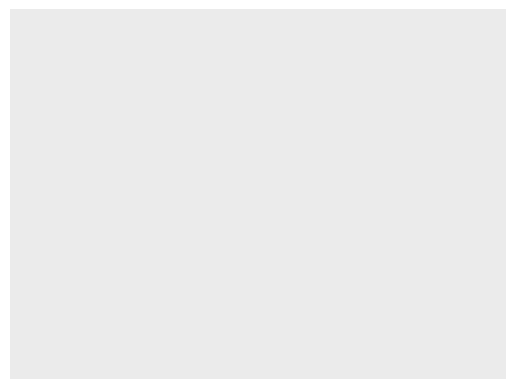

<ggplot: (357697082)>

In [10]:
# Layer: Data 
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot

# Let's filter down to national presidential polls for simplicity
polls_2020 = polls.query("year==2020")
display(polls_2020.head(2))

# Plot an empty ggplot with the data
ggplot(data=polls_2020)

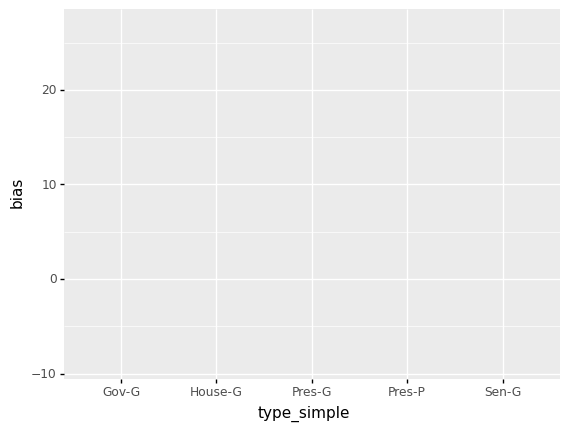

<ggplot: (680624544)>

In [48]:
# Layer: Data + Aesthetics
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes

ggplot(polls_2020, aes(x='type_simple', y='bias')) 

/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 199 rows containing missing values.


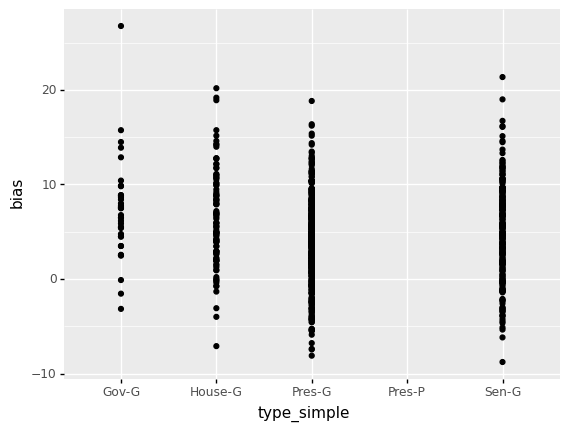

<ggplot: (683493572)>

In [49]:
# Layer: Data + Aesthetics + Geometries
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes, geom_point

ggplot(polls_2020, aes(x='type_simple', y='bias')) + geom_point()

/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 199 rows containing missing values.


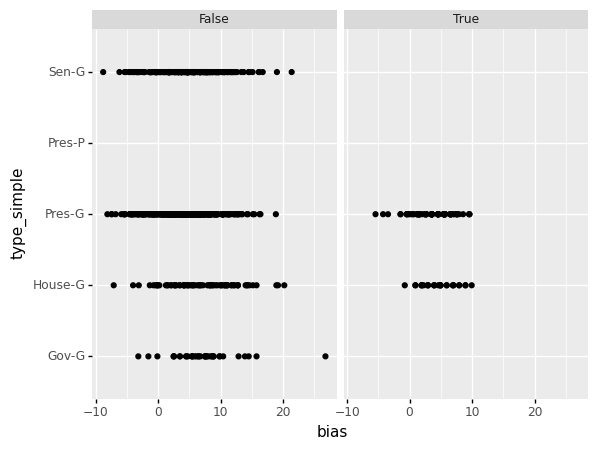

<ggplot: (683784108)>

In [50]:
# Layer: Data + Aesthetics + Geometries + Facets
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes, geom_point, facet_wrap

ggplot(polls_2020, aes(x='bias', y='type_simple')) + geom_point() + facet_wrap("location=='US'")

# note: explore facet_wrap vs facet_grid

/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_summary : Removed 199 rows containing non-finite values.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 199 rows containing missing values.


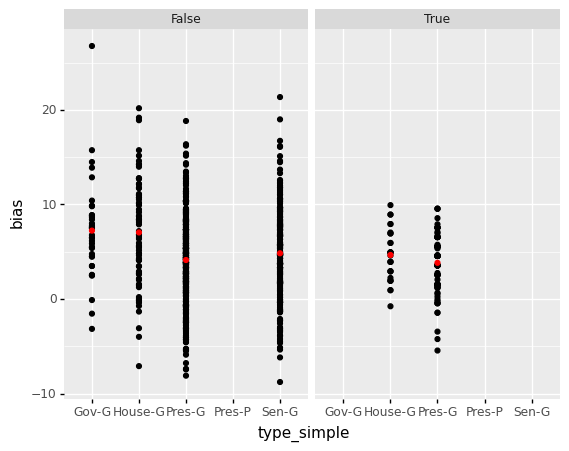

<ggplot: (683937109)>

In [52]:
# Layer: Data + Aesthetics + Geometries + Facets + Statistics
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes, geom_point, facet_grid, stat_summary
# Get average within state

(
    ggplot(polls_2020, aes(x='type_simple', y='bias')) 
    + geom_point() 
    + facet_wrap("location=='US'")
    + stat_summary(aes(label='type_simple'), fun_y=np.mean, fun_ymin=np.min, fun_ymax=np.max, color='red', geom='point')
)



/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_summary : Removed 199 rows containing non-finite values.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 199 rows containing missing values.


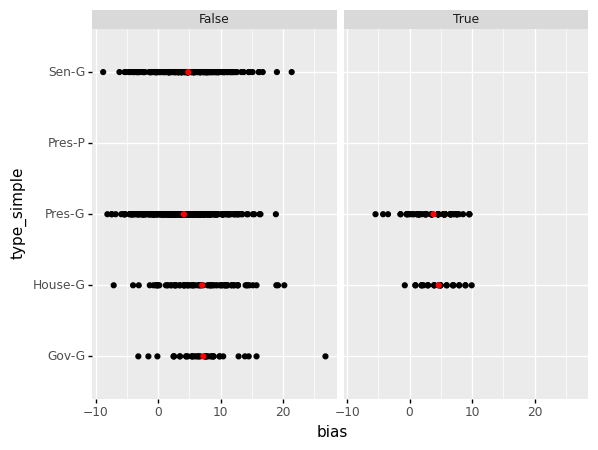

<ggplot: (680584509)>

In [54]:
# Layer: Data + Aesthetics + Geometries + Facets + Statistics + Coordinates
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes, geom_point, facet_grid, stat_summary, coord_flip
# Get average within state

(
    ggplot(polls_2020, aes(x='type_simple', y='bias')) 
    + geom_point() 
    + facet_wrap("location=='US'")
    + stat_summary(aes(label='type_simple'), fun_y=np.mean, fun_ymin=np.min, fun_ymax=np.max, color='red', geom='point')
    + coord_flip()
)



/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_summary : Removed 200 rows containing non-finite values.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 200 rows containing missing values.


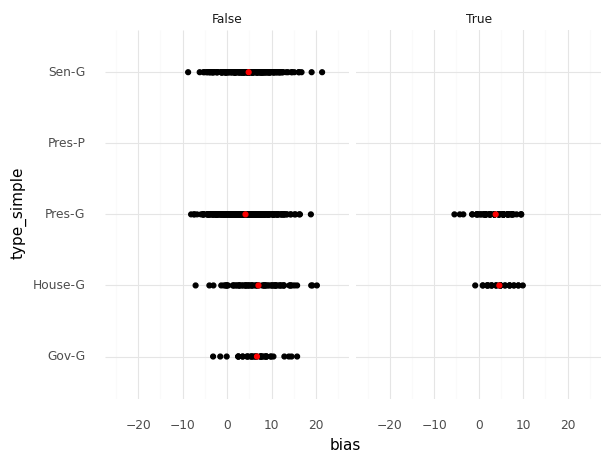

<ggplot: (678595831)>

In [61]:
# Layer: Data + Aesthetics + Geometries + Facets + Statistics + Coordinates + Themes

# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html
from plotnine import ggplot, aes, geom_point, facet_grid, stat_summary, coord_flip, theme_minimal, ylim
# Get average within state

(
    ggplot(polls_2020, aes(x='type_simple', y='bias')) 
    + geom_point() 
    + facet_wrap("location=='US'")
    + stat_summary(aes(label='type_simple'), fun_y=np.mean, fun_ymin=np.min, fun_ymax=np.max, color='red', geom='point')
    + ylim(-25, 25)
    + coord_flip()
    + theme_minimal()
)



### Annotations

/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_summary : Removed 200 rows containing non-finite values.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 200 rows containing missing values.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#ff0000ff', '#ff0000ff', '#ff0000ff', '#ff0000ff']) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
/Users/mehtad/Development/code4journalism/exploratory-data-visualization/.venv/lib/python3.9/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#ff0000ff', '#ff000

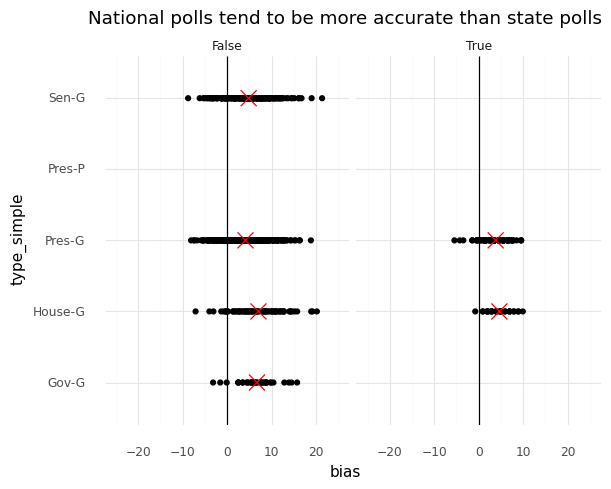

<ggplot: (677660383)>

In [75]:
# Layer: Data + Aesthetics + Geometries + Facets + Statistics + Coordinates + Themes
# https://englelab.gatech.edu/useRguide/introduction-to-ggplot2.html

# + ANNOTATIONS!

from plotnine import ggplot, aes, geom_point, facet_grid, stat_summary, coord_flip, theme_minimal, ylim, geom_hline, ggtitle
# Get average within state

(
    ggplot(polls_2020, aes(x='type_simple', y='bias')) 
    + geom_point() 
    + geom_hline(aes(yintercept=0))
    + facet_wrap("location=='US'")
    + stat_summary(aes(label='type_simple'), fun_y=np.mean, fun_ymin=np.min, fun_ymax=np.max, color='red', 
                   geom='point', shape='x', size=6)
    + ylim(-25, 25)
    + coord_flip()
    + theme_minimal()
    + ggtitle("National polls tend to be more accurate than state polls")
)

